# Context
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

**Price_range is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)**

# Columns

1. Battery_power = Total energy a battery can store in one time measured in mAh
2. Blue = has bluetooth or not
3. clock_speed = speed at which microprocessor executes instructions
4. dual_sim = has dual sim support or not
5. fc = front camera megapixel
6. four_g = has 4G or not
7. int_memory = internal memory in GB
8. m_depth = mobile depth in cm
9. mobile_wt = weight
10. n_cores = number of cores of processor
11. pc = primary camera megapixel
12. px_height = pixel resolution height
13. px_width = pixel resolution width
14. ram = RAM in MB
15. sc_h = screen height in cm
16. sc_w = screen width in cm
17. talk_time = battery longevity after charging
18. three_g = has 3G or not
19. touch_screen
20. wifi
21. price_range

# Data Prep

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('mobile_phone_train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
for i in df.columns:
  print(f"Unique values in {i}:", df[i].unique())

Unique values in battery_power: [ 842 1021  563 ... 1139 1467  858]
Unique values in blue: [0 1]
Unique values in clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique values in dual_sim: [0 1]
Unique values in fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique values in four_g: [0 1]
Unique values in int_memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique values in m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values in mobile_wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 13

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, 'Price Range Distribution')

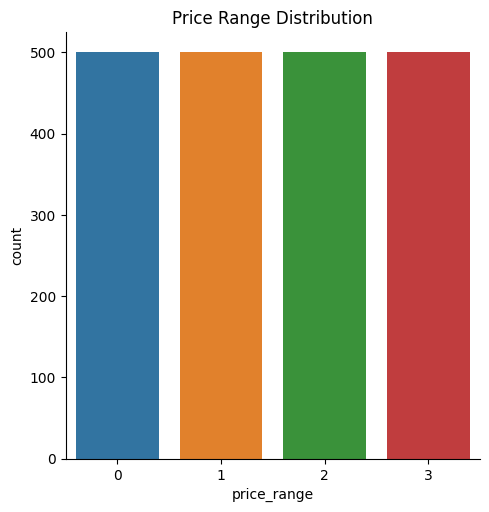

In [48]:
sns.catplot(data=df, x='price_range', kind='count')
plt.title("Price Range Distribution")

price range has equal distribution

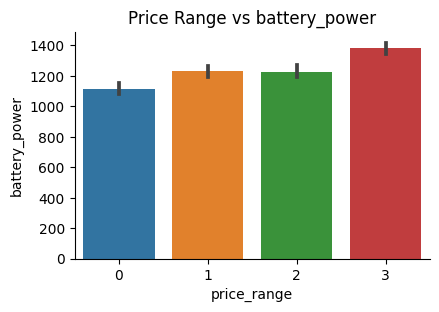

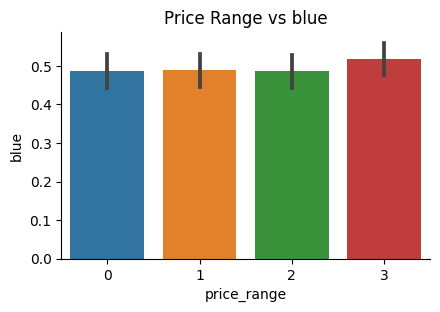

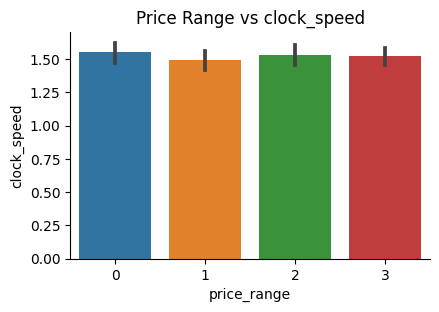

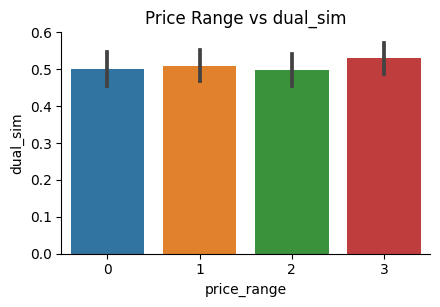

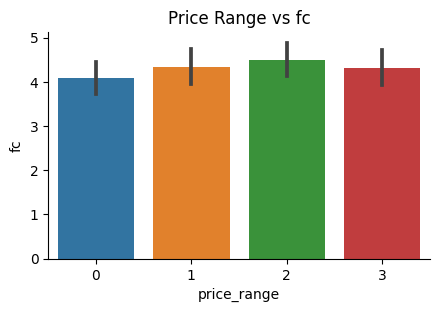

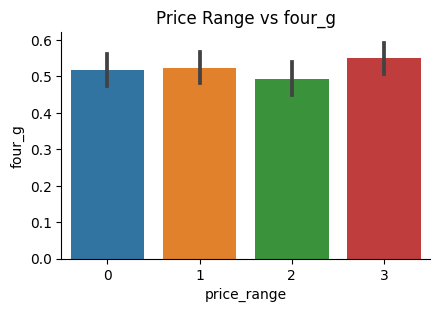

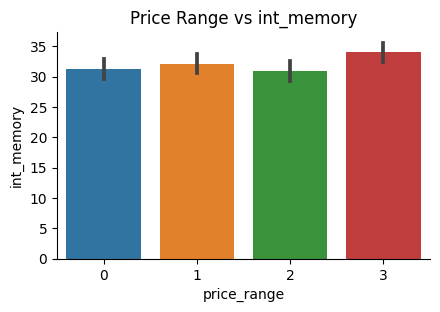

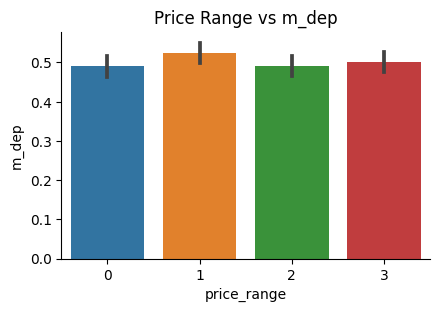

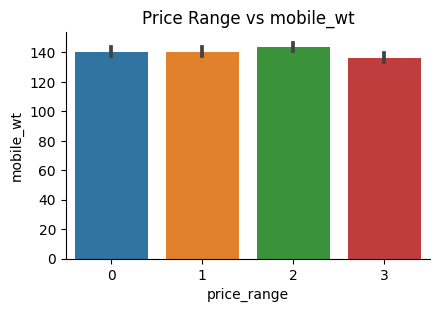

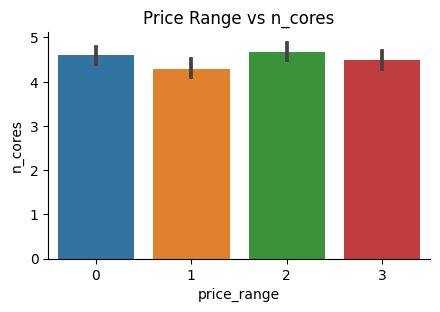

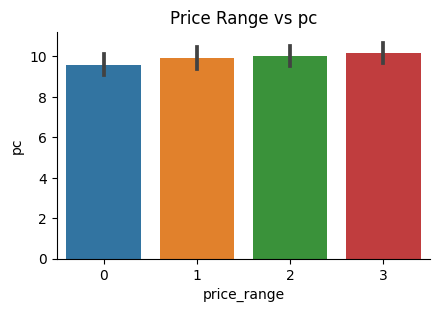

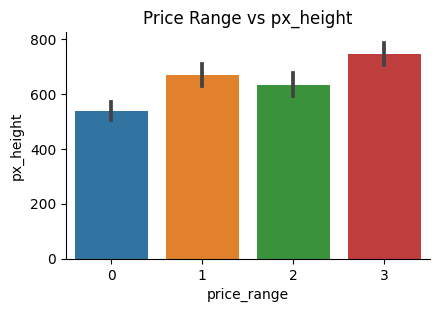

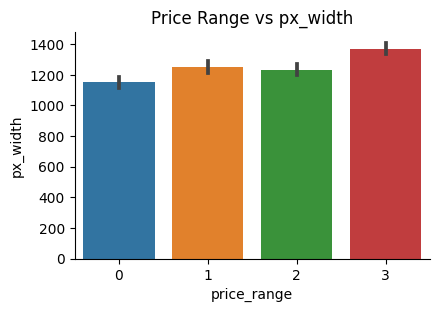

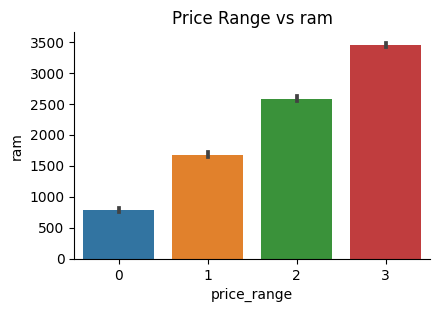

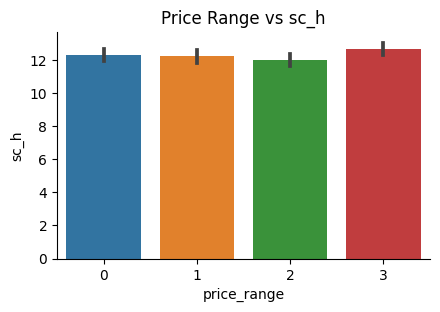

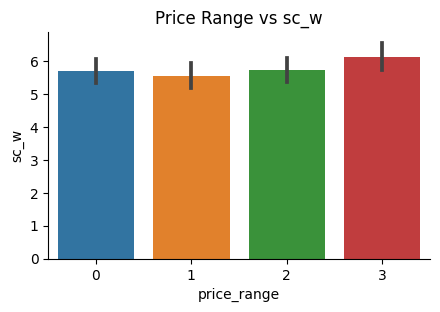

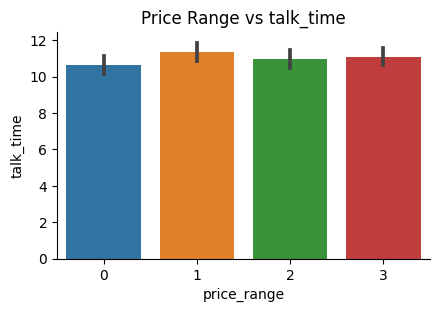

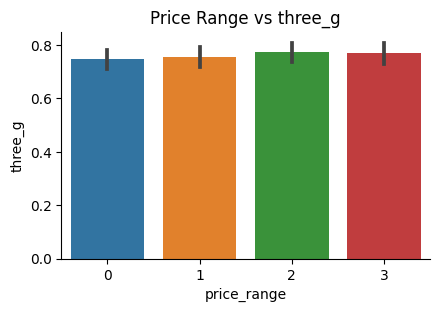

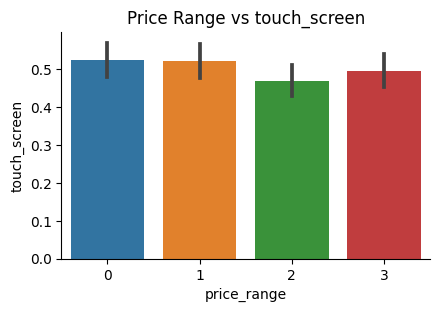

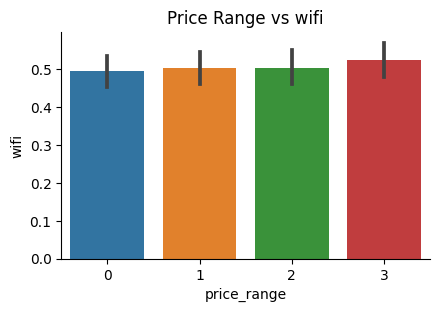

In [8]:
column = df.columns[~(df.columns == 'price_range')]
for i in column:
  sns.catplot(data=df, x='price_range', y=i, kind='bar', height=3, aspect=1.5)
  plt.title(f"Price Range vs {i}")

the only strong variable that determine the price_range is RAM

## Price Range and RAM

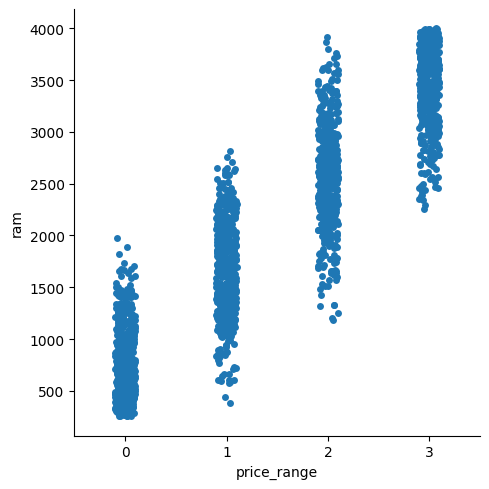

In [9]:
sns.catplot(data=df, x='price_range', y='ram')

the higher the RAM, the more expensive the price range will be

## Price Range and Battery Power

Text(0.5, 1.0, 'Average Battery Power by Price Range')

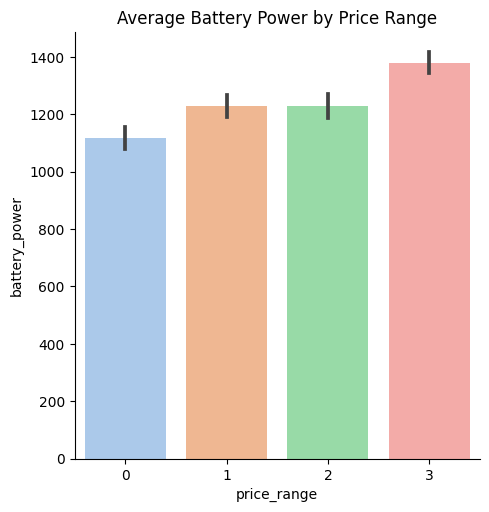

In [10]:
sns.catplot(data=df, x='price_range', y='battery_power', kind='bar', palette='pastel')
plt.title('Average Battery Power by Price Range')

Text(0.5, 1.0, 'Battery Power Distribution by Price Range')

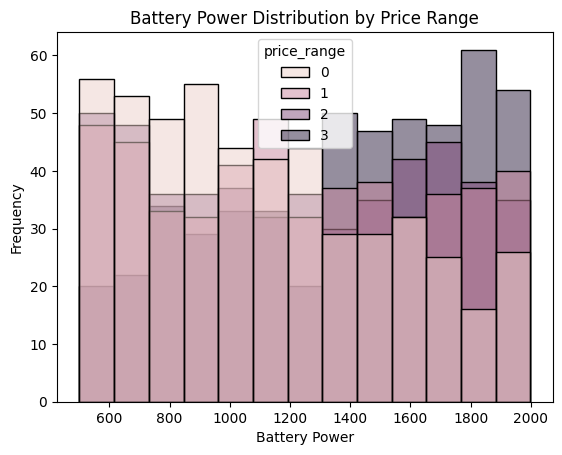

In [11]:
sns.histplot(data=df, x='battery_power', hue='price_range')

# Add labels and a title
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.title('Battery Power Distribution by Price Range')

the higher the battery power, the more expensive the price range will be
we can also see that price range 1 - 2 (medium - high cost) have very similar battery power

## Price Range and Camera Megapixel

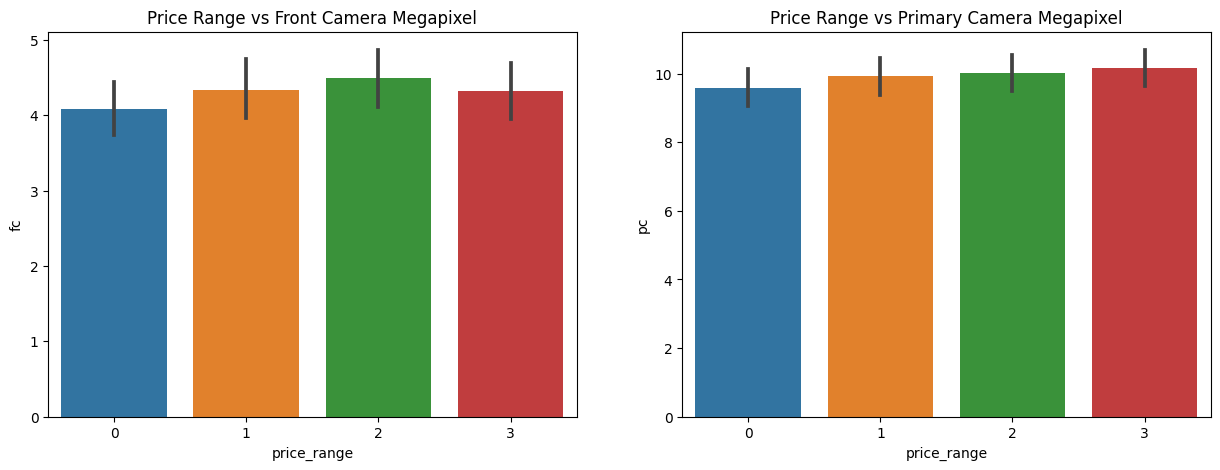

In [12]:
# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create bar plots for 'fc' and 'pc' with specified axes
sns.barplot(data=df, ax=ax[0], x='price_range', y='fc')
sns.barplot(data=df, x='price_range', y='pc', ax=ax[1])

# Set titles for subplots
ax[0].set_title("Price Range vs Front Camera Megapixel")
ax[1].set_title("Price Range vs Primary Camera Megapixel")

# Display the plots
plt.show()

Surprisingly, price range 2 (high cost) has better front camera and has very close primary camera megapixel to the most expensive phones.


## Price Range and Internal Memory & Core Processor

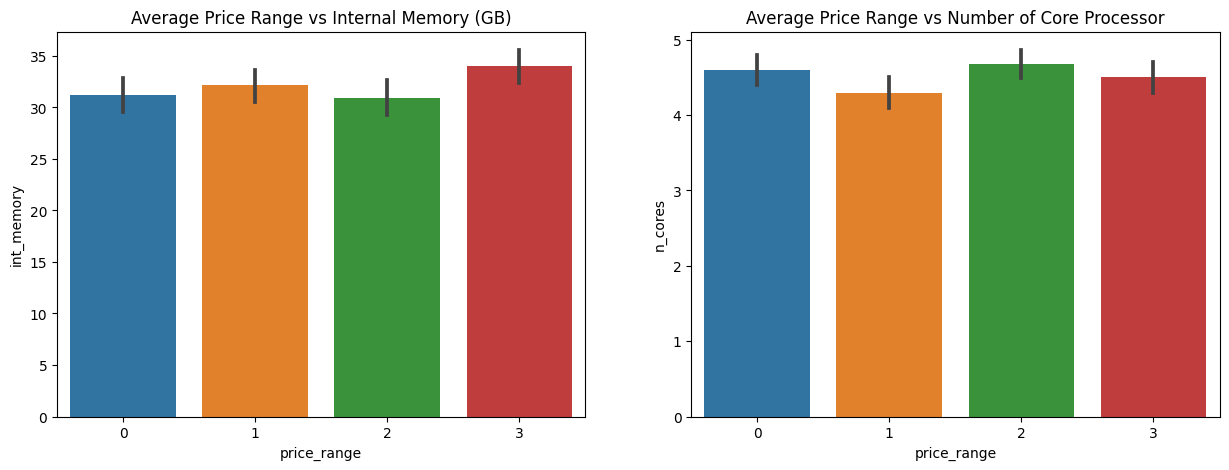

In [13]:
# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create bar plots for 'fc' and 'pc' with specified axes
sns.barplot(data=df, ax=ax[0], x='price_range', y='int_memory')
sns.barplot(data=df, x='price_range', y='n_cores', ax=ax[1])

# Set titles for subplots
ax[0].set_title("Average Price Range vs Internal Memory (GB)")
ax[1].set_title("Average Price Range vs Number of Core Processor")

# Display the plots
plt.show()

In [14]:
print(df["int_memory"].groupby(df["price_range"]).mean().sort_values(ascending=False))
print(df["n_cores"].groupby(df["price_range"]).mean().sort_values(ascending=False))

price_range
3    33.976
1    32.116
0    31.174
2    30.920
Name: int_memory, dtype: float64
price_range
2    4.682
0    4.600
3    4.502
1    4.298
Name: n_cores, dtype: float64



In my opinion, it will be worth it to buy phones within price range 2 for someone who likes photography and take selfies, as some of the phones within price range 2 also not that bad of internal memory, still in range of 30 altough range 2 is the lowest one.

Someone who is into gaming should buy a phone within price range 3, as it has higher RAM, battery power, and internal memory.

In [15]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Check Outliers

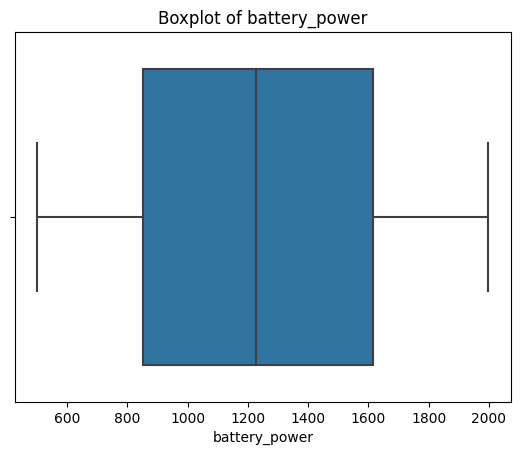

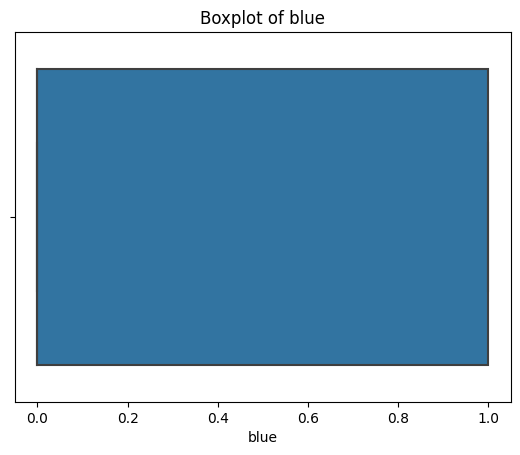

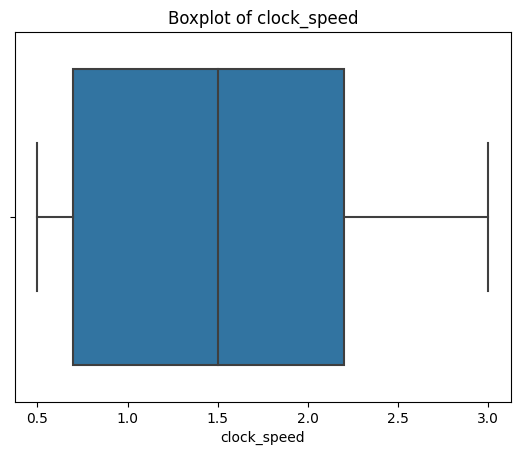

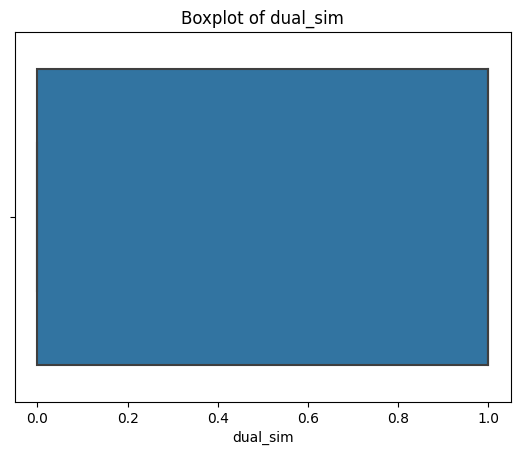

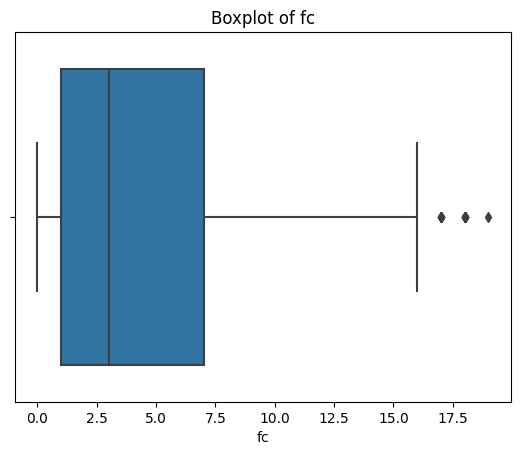

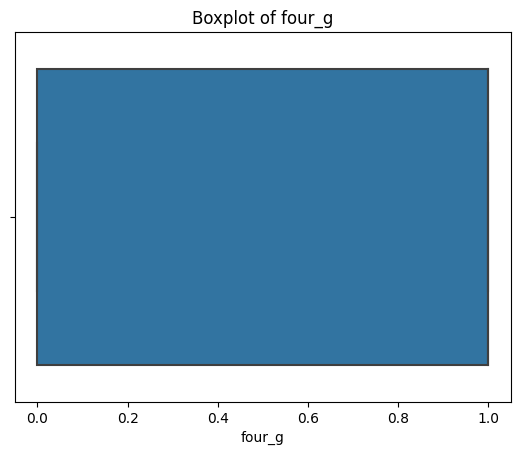

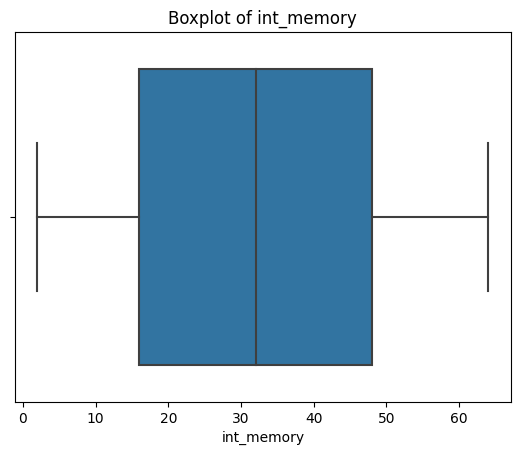

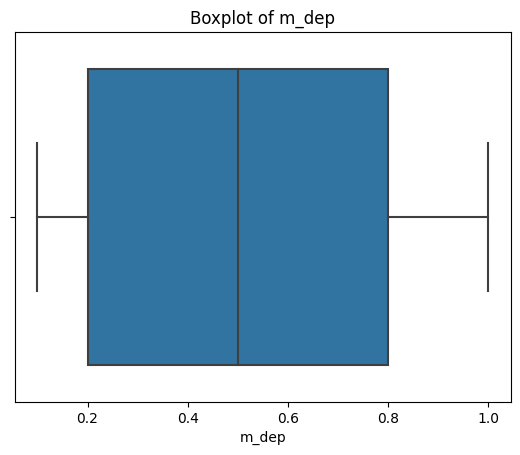

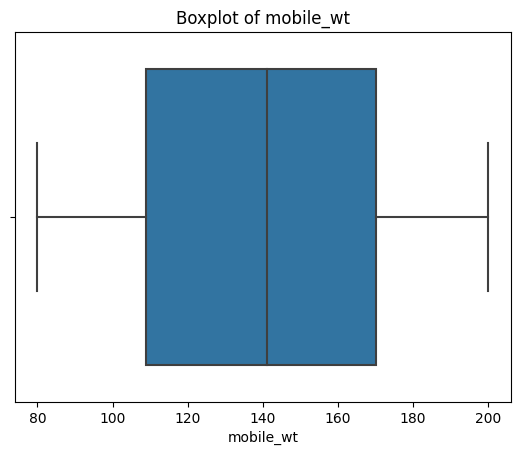

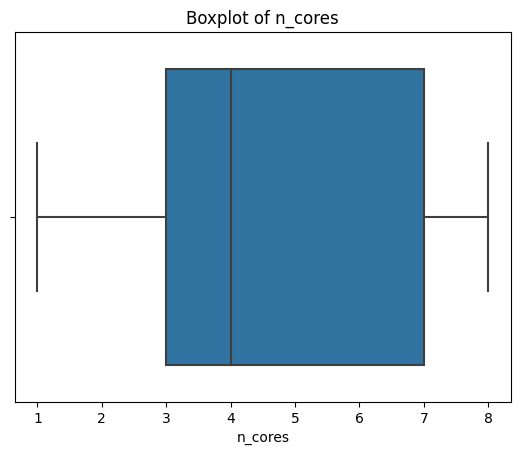

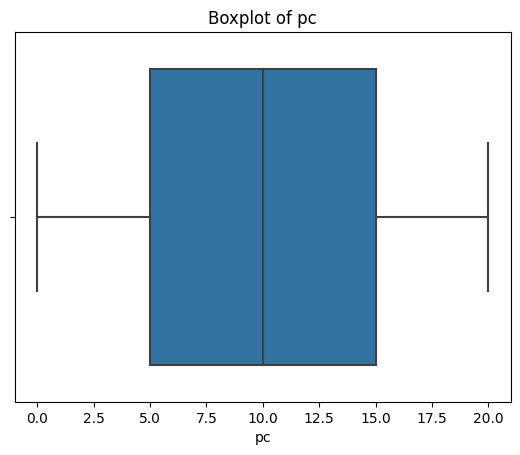

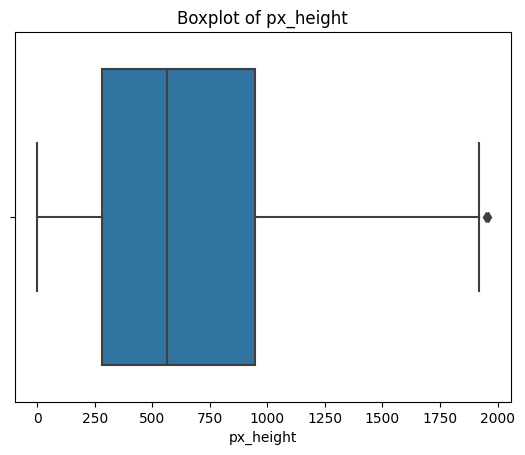

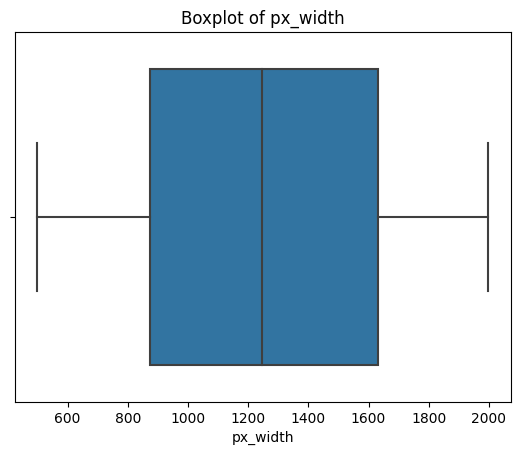

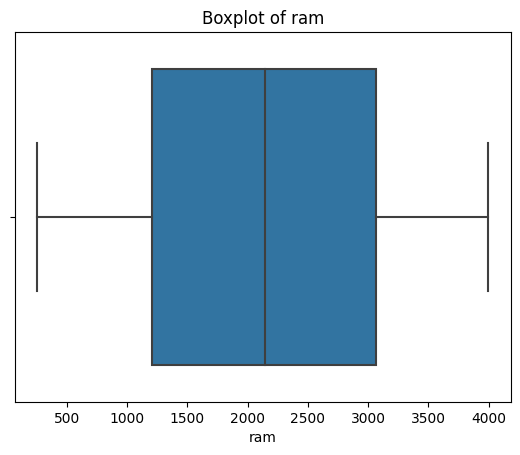

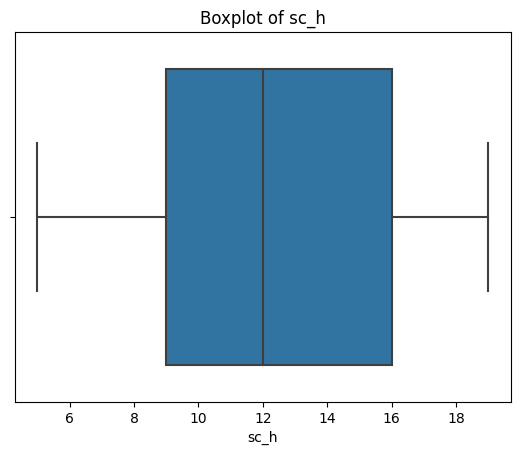

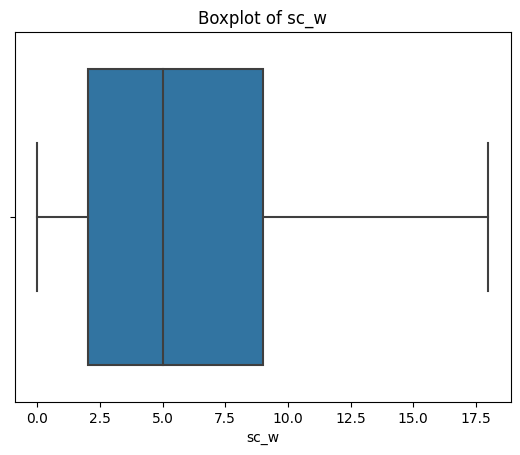

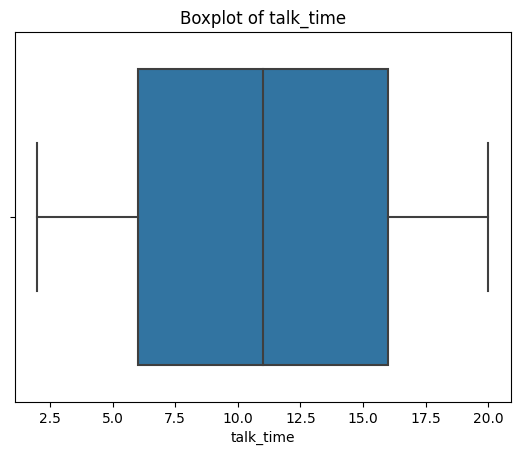

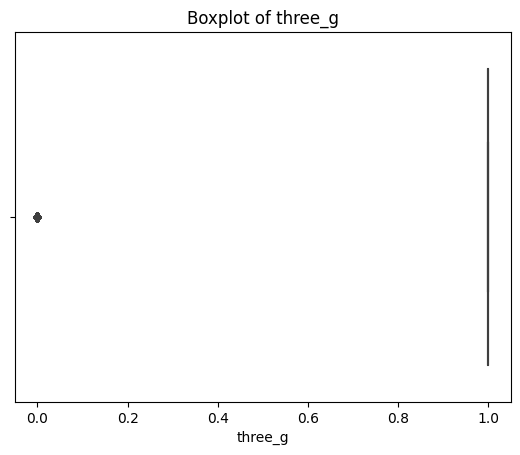

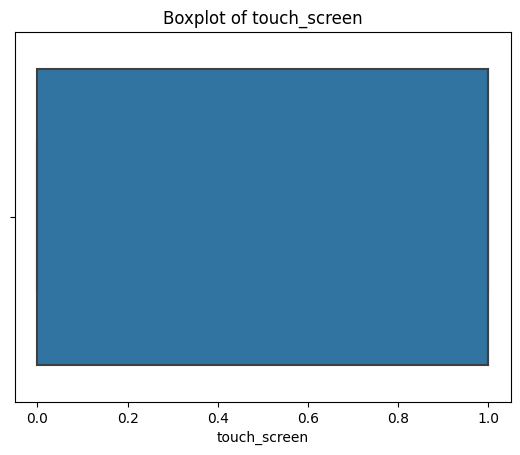

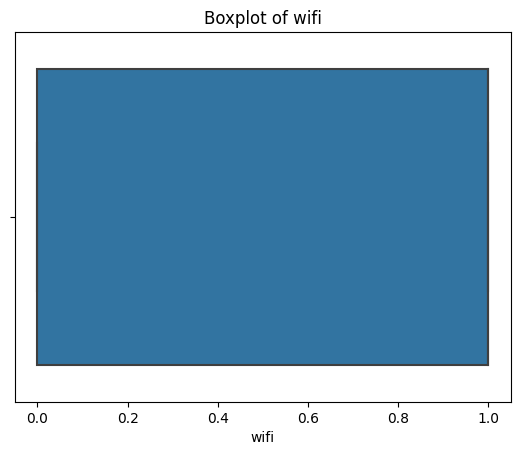

In [16]:
column = df.columns[~(df.columns == 'price_range')]
for i in column:
  sns.boxplot(data=df, x=i)  # Replace 'column_name' with the column you want to check
  plt.title(f"Boxplot of {i}")
  plt.show()

In [17]:
# Calculate IQR and bounds for 'fc' column
Q1 = df['fc'].quantile(0.25)
Q3 = df['fc'].quantile(0.75)
iqr = Q3 - Q1
threshold = 1.5 * iqr

# Identify and print outliers in the 'fc' column
outliers = df[(df['fc'] < Q1 - threshold) | (df['fc'] > Q3 + threshold)]['fc']
print("Outliers in the 'fc' column:")
print(outliers)

Outliers in the 'fc' column:
95      18
169     17
226     18
229     17
300     17
305     18
372     17
584     17
1387    18
1406    18
1416    18
1549    17
1554    18
1693    18
1705    19
1880    18
1882    18
1888    18
Name: fc, dtype: int64


there is outliers in fc column (front camera megapixel) but I dont remove it since there are possibilities that phones have higher megapixel (newer or expensive phone)

# Split Data

In [18]:
from sklearn.model_selection import train_test_split

X = df[df.columns.difference(['price_range'])]
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [19]:
y_train

0       1
816     0
790     0
361     0
592     1
       ..
1791    0
1096    3
1932    1
235     0
1061    1
Name: price_range, Length: 1600, dtype: int64

# Feature Engineering

## Check Multicollinearity

### Check correlation with heatmap

<Axes: >

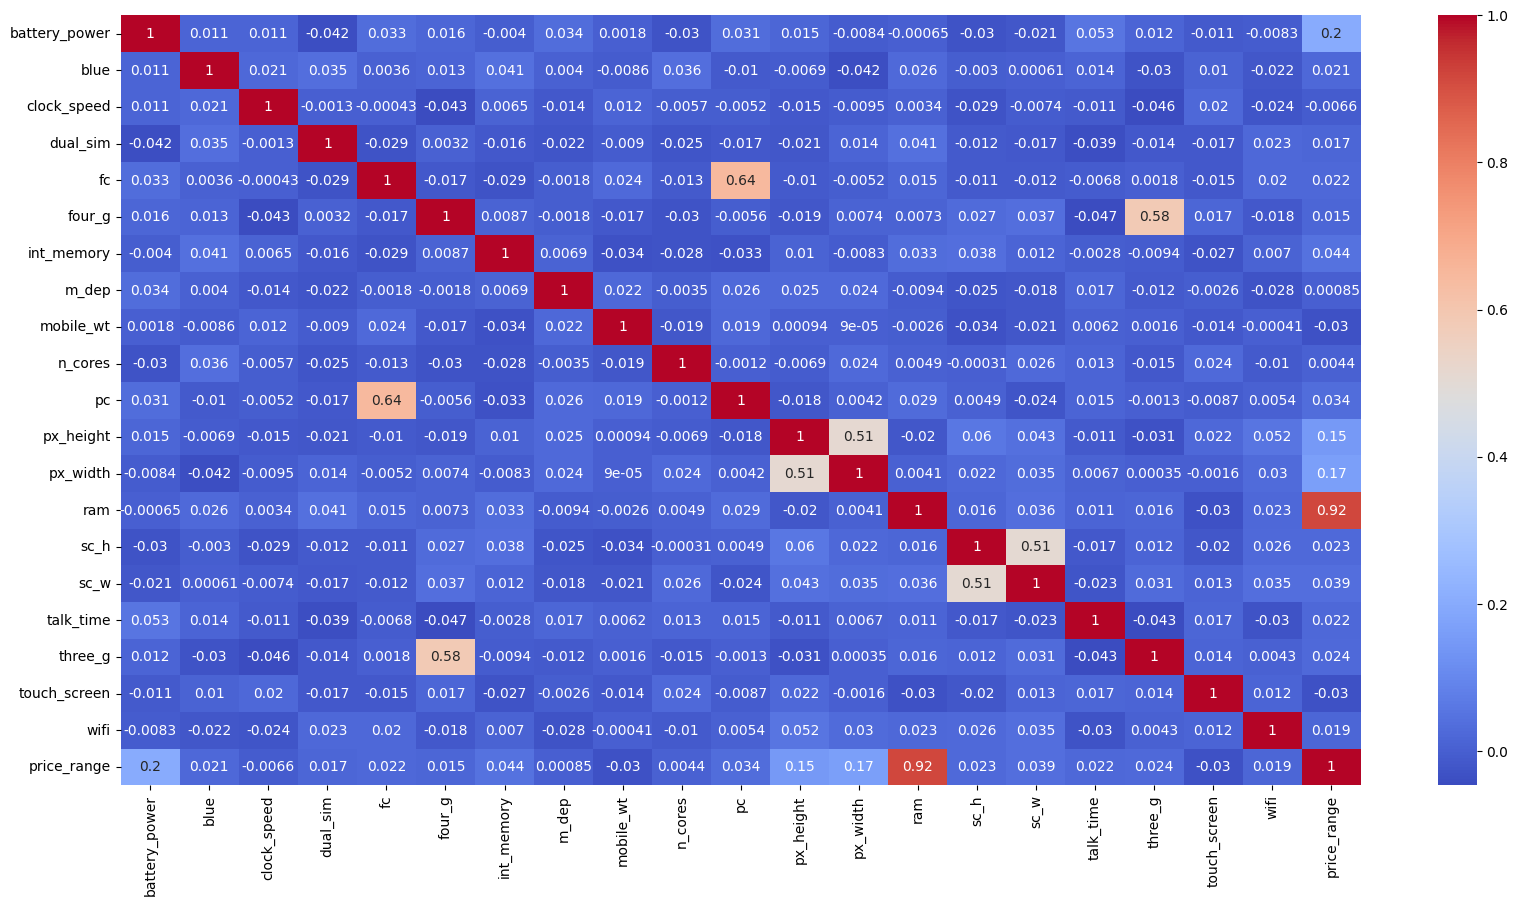

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

from the boxplot above we can see that several columns have correlation between them and it's quite big (pc and fc = 0.64, three_g and four_g = 0.58, px_width and px_height = 0.61)

### Calculate VIF score
To confirm if there are legit multicollinearities or not

In [21]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train)

vif_df = pd.DataFrame([vif(X_vif.values, i)
               for i in range(X_vif.shape[1])],
              index=X_vif.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,battery_power,1.007876
2,blue,1.015583
3,clock_speed,1.011811
4,dual_sim,1.016680
5,fc,1.720982
6,four_g,1.547909
7,int_memory,1.012049
8,m_dep,1.006569
9,mobile_wt,1.006186
10,n_cores,1.012133


turns out the VIF scores are in normal range, so we the multicollinearity check step is done

## Feature Scaling with StandardScaler()
First, I collect all columns EXCEPT those who have [0, 1] values as we dont want to scale them because they are already in numeric

In [22]:
# Iterate through columns
def feature_scale(dataframe):
  selected_columns = []
  for column in dataframe.columns:
    unique_values = dataframe[column].unique()
    if not (0 in unique_values and 1 in unique_values) or len(unique_values) > 2:
      selected_columns.append(column)
  # Create a new DataFrame with selected columns
  filtered_df = dataframe[selected_columns]
  return filtered_df

In [23]:
x_train_feature_scale = feature_scale(X_train)
X_train[x_train_feature_scale.columns]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
816,805,0.7,0,64,0.1,97,4,14,641,704,418,11,6,17
790,911,2.9,0,46,0.1,181,5,1,461,670,363,9,5,17
361,899,0.5,13,57,0.9,172,2,18,788,1331,364,11,1,7
592,1263,0.5,12,64,0.3,175,5,18,178,1883,1183,14,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1203,0.5,0,11,0.9,109,2,12,35,510,1672,17,13,19
1096,1154,2.0,6,35,0.8,159,5,16,1003,1827,3262,16,15,16
1932,718,1.6,1,30,0.4,93,3,12,662,997,1601,10,9,12
235,1523,1.8,6,11,0.1,129,1,8,148,1606,707,19,8,19


In [24]:
X_test_feature_scale = feature_scale(X_test)
X_test[X_test_feature_scale.columns]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
674,1034,2.6,2,45,0.3,190,3,4,182,1293,969,15,1,7
1699,1002,1.8,1,45,0.7,180,7,7,948,1007,1234,19,13,18
1282,609,0.5,4,10,0.1,81,6,6,113,1524,1905,16,3,18
1315,1510,0.6,1,32,0.7,135,3,8,963,1520,854,8,2,10
1210,805,1.7,0,58,0.9,168,3,10,81,1544,3397,7,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1266,1.9,0,7,0.2,184,3,12,346,1468,2532,10,5,4
763,1741,1.8,0,14,0.7,143,8,0,730,1895,3387,11,3,3
385,1880,1.8,4,18,0.7,138,3,5,71,699,3333,17,15,7
1667,1967,0.5,0,46,0.6,199,1,7,518,1374,1567,15,2,7


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for X_test, only use transform to apply the same scaling parameters to new or unseen data

In [26]:
X_test_feature_scale = feature_scale(X_test)
X_test[X_test_feature_scale.columns]
X_train[x_train_feature_scale.columns] = sc.fit_transform(X_train[x_train_feature_scale.columns])
X_test[X_test_feature_scale.columns]= sc.transform(X_test[X_test_feature_scale.columns])

### Result

In [27]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.931816,0,0.841708,0,-0.764028,0,-1.397035,0.340495,1.380102,-1.102412,-1.298686,-1.403771,-1.131787,0.398985,-0.787650,0.292587,1.479483,0,0,1
816,-1.016747,1,-0.995581,0,-0.994939,0,1.739356,-1.384622,-1.217267,-0.230509,0.682150,0.002018,-1.251690,-1.550368,-0.311189,0.063107,1.110764,0,1,1
790,-0.773432,1,1.699110,0,-0.994939,0,0.748917,-1.384622,1.180304,0.205442,-1.463755,-0.405457,-1.330088,-1.600680,-0.787650,-0.166373,1.110764,0,1,0
361,-0.800977,0,-1.240553,1,2.006908,1,1.354185,1.375565,0.923422,-1.102412,1.342429,0.334789,0.194063,-1.599765,-0.311189,-1.084293,-0.732828,1,1,0
592,0.034559,0,-1.240553,0,1.775997,0,1.739356,-0.694575,1.009049,0.205442,1.342429,-1.046098,1.466879,-0.850577,0.403503,-0.625333,1.110764,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,-0.103167,1,-1.240553,1,-0.994939,1,-1.176938,1.375565,-0.874757,-1.102412,0.352011,-1.369815,-1.699021,-0.403259,1.118195,1.669466,1.479483,1,1,0
1096,-0.215643,0,0.596736,0,0.390529,1,0.143648,1.030542,0.552369,0.205442,1.012290,0.821495,1.337752,1.051209,0.879964,2.128426,0.926405,1,0,0
1932,-1.216449,1,0.106792,1,-0.764028,1,-0.131474,-0.349552,-1.331437,-0.666461,0.352011,0.049556,-0.576083,-0.468207,-0.549419,0.751547,0.188968,1,1,1
235,0.631370,1,0.351764,0,0.390529,1,-1.176938,-1.384622,-0.303906,-1.538363,-0.308268,-1.114011,0.828165,-1.286002,1.594656,0.522067,1.479483,1,1,0


In [28]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
674,-0.491094,0,1.331652,1,-0.533117,1,0.693892,-0.694575,1.437187,-0.666461,-0.968546,-1.037043,0.106441,-1.046335,0.641734,-1.084293,-0.732828,1,0,0
1699,-0.564548,1,0.351764,0,-0.764028,0,0.693892,0.685519,1.151762,1.077345,-0.473337,0.696989,-0.553025,-0.803924,1.594656,1.669466,1.295123,1,1,0
1282,-1.466651,1,-1.240553,0,-0.071294,1,-1.231962,-1.384622,-1.673947,0.641393,-0.638407,-1.193242,0.639087,-0.190120,0.879964,-0.625333,1.295123,1,1,1
1315,0.601530,0,-1.118067,1,-0.764028,0,-0.021425,0.685519,-0.132651,-0.666461,-0.308268,0.730945,0.629864,-1.151533,-1.025880,-0.854813,-0.179750,1,0,1
1210,-1.016747,1,0.229278,1,-0.994939,1,1.409210,1.375565,0.809252,-0.666461,0.021872,-1.265682,0.685204,1.174701,-1.264111,0.063107,-1.654624,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.041445,0,0.474250,1,-0.994939,1,-1.397035,-1.039599,1.265932,-0.666461,0.352011,-0.665789,0.509961,0.383434,-0.549419,-0.166373,-1.285905,1,1,1
763,1.131774,1,0.351764,0,-0.994939,0,-1.011865,0.685519,0.095689,1.513296,-1.628825,0.203491,1.494549,1.165554,-0.311189,-0.625333,-1.470265,1,0,0
385,1.450838,1,0.351764,0,-0.071294,1,-0.791767,0.685519,-0.047024,-0.666461,-0.803477,-1.288320,-1.263220,1.116157,1.118195,2.128426,-0.732828,1,0,0
1667,1.650541,0,-1.240553,0,-0.994939,1,0.748917,0.340495,1.694070,-1.538363,-0.473337,-0.276424,0.293213,-0.499309,0.641734,-0.854813,-0.732828,1,1,0


# Machine Learning Modeling - Classifications

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, precision_recall_curve
import numpy as np

## Logistic Regression

In [30]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

In [31]:
accuracy = model.score(X_test, y_test)
print("Accuracy is: ", accuracy)

Accuracy is:  0.84


the accuracy is pretty good, but I want to see if other algorithms have similar or higher accuracy

## Use other classifiers (Linear SVC, KNN Classifier, SVC, Random Forest, AdaBoost)

In [32]:
C = 10
classifier = {'Linear SVC': SVC(kernel='linear', C=C, probability=True, random_state=0),
              'KNN Classifier': KNeighborsClassifier(C),
              'SVC': SVC(),
              'RFST': RandomForestClassifier(n_estimators=100),
              'ADA': AdaBoostClassifier(n_estimators=100)}

## Print Result

In [33]:
n_classifiers = len(classifier)

for index, (name, classifier) in enumerate(classifier.items()):
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for Linear SVC: 97.2% 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        92
           1       0.97      0.96      0.96        96
           2       0.95      0.98      0.97       106
           3       0.99      0.97      0.98       106

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Accuracy (train) for KNN Classifier: 57.0% 
              precision    recall  f1-score   support

           0       0.64      0.77      0.70        92
           1       0.40      0.44      0.42        96
           2       0.49      0.50      0.50       106
           3       0.83      0.58      0.69       106

    accuracy                           0.57       400
   macro avg       0.59      0.57      0.57       400
weighted avg       0.59      0.57      0.57       400

Accuracy (train) for SVC: 90.8% 
             

we can see that Linear SVC has the highest accuracy, so I will proceed to use that algorithm for new data

In [34]:
SVCmodel = SVC(kernel='linear', C=C, probability=True, random_state=0)
model = SVCmodel.fit(X_train, y_train)
y_pred = SVCmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (train) for Linear SVC: %0.1f%% " % (accuracy * 100))
print(classification_report(y_test,y_pred))

Accuracy (train) for Linear SVC: 97.2% 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        92
           1       0.97      0.96      0.96        96
           2       0.95      0.98      0.97       106
           3       0.99      0.97      0.98       106

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



# Predict New Data

## Get new data

In [35]:
new_data = pd.read_csv('mobile_phone_test.csv')

In [36]:
new_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [37]:
new_data = new_data.drop('id',axis=1)

In [38]:
new_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


## Feature Scaling

I am going to copy the dataset to new_data_scaled so that I can use the unscaled data for the end result

In [39]:
new_data_scaled = new_data.copy()

In [40]:
new_data_feature_to_scale = feature_scale(new_data_scaled)
new_data_scaled[new_data_feature_to_scale.columns]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1043,1.8,14,5,0.1,193,3,16,226,1412,3476,12,7,2
1,841,0.5,4,61,0.8,191,5,12,746,857,3895,6,0,7
2,1807,2.8,1,27,0.9,186,3,4,1270,1366,2396,17,10,10
3,1546,0.5,18,25,0.5,96,8,20,295,1752,3893,10,0,7
4,1434,1.4,11,49,0.5,108,6,18,749,810,1773,15,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1.9,0,54,0.5,170,7,17,644,913,2121,14,8,15
996,609,1.8,0,13,0.9,186,4,2,1152,1632,1933,8,1,19
997,1185,1.4,1,8,0.5,80,1,12,477,825,1223,5,0,14
998,1533,0.5,0,50,0.4,171,2,12,38,832,2509,15,11,6


**ONLY** use transform for scaling

In [41]:
new_data_scaled[new_data_feature_to_scale.columns]= sc.transform(new_data_scaled[new_data_feature_to_scale.columns])

In [42]:
new_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [43]:
new_data_scaled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.470435,1,0.351764,1,2.237819,0,-1.507084,-1.384622,1.522814,-0.666461,1.012290,-0.937438,0.380835,1.246967,-0.072958,0.292587,-1.654624,0,1,0
1,-0.934112,1,-1.240553,1,-0.071294,1,1.574283,1.030542,1.465729,0.205442,0.352011,0.239711,-0.898899,1.630252,-1.502342,-1.313772,-0.732828,1,0,0
2,1.283272,1,1.576624,0,-0.764028,0,-0.296547,1.375565,1.323017,-0.666461,-0.968546,1.425916,0.274767,0.259027,1.118195,0.981027,-0.179750,0,1,1
3,0.684165,0,-1.240553,1,3.161465,1,-0.406596,-0.004528,-1.245809,1.513296,1.672568,-0.781240,1.164816,1.628422,-0.549419,-1.313772,-0.732828,1,1,0
4,0.427077,0,-0.138179,0,1.545085,1,0.913990,-0.004528,-0.903299,0.641393,1.342429,0.246503,-1.007273,-0.310869,0.641734,0.522067,-0.732828,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.037661,1,0.474250,0,-0.994939,1,1.189112,-0.004528,0.866337,1.077345,1.177359,0.008809,-0.769773,0.007468,0.403503,0.522067,0.742046,1,1,0
996,-1.466651,0,0.351764,1,-0.994939,0,-1.066889,1.375565,1.323017,-0.230509,-1.298686,1.158794,0.888116,-0.164507,-1.025880,-1.084293,1.479483,0,1,1
997,-0.144484,0,-0.138179,0,-0.764028,1,-1.342011,-0.004528,-1.702490,-1.538363,0.352011,-0.369237,-0.972685,-0.813986,-1.740572,-1.313772,0.557687,1,0,0
998,0.654325,1,-1.240553,1,-0.994939,0,0.969014,-0.349552,0.894879,-1.102412,0.352011,-1.363023,-0.956545,0.362395,0.641734,1.210507,-0.917187,0,1,0


## Predict new data with Linear SVC

In [44]:
new_predictions = SVCmodel.predict(new_data_scaled)
new_predictions

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 3, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

## Make a new dataframe
by combining new_data (unscaled data, the original one) with the prediction result that used scaled data

In [45]:
combined_data = pd.DataFrame(data=new_data, columns=new_data.columns)  # Assuming columns in new_data match the original
combined_data['Predictions'] = new_predictions

# Final Result

In [46]:
combined_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Predictions
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [47]:
combined_data.to_csv('predicted_mobile_price.csv')